In [2]:
%pip install pandas matplotlib seaborn openpyxl numpy

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.3 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------

In [19]:
import os
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"

print(f"🕵️‍♂️ INSPECTION DU DOSSIER : {IMG_DIR}")

# 1. On liste tous les dossiers à l'intérieur
if not IMG_DIR.exists():
    print("❌ ERREUR : Le dossier 'data/CGGA' n'existe pas !")
else:
    # On récupère tous les noms de dossiers (ex: CGGA_1017)
    patients_images = [p.name for p in IMG_DIR.iterdir() if p.is_dir()]
    
    # 2. On compte
    nombre_images = len(patients_images)
    
    print(f"📊 J'ai trouvé {nombre_images} dossiers patients (Images).")
    
    # 3. On affiche les exemples
    print("\n🔍 Voici les 5 premiers noms trouvés (Côté Image) :")
    print(patients_images[:5])
    
    # On garde cette liste en mémoire pour tout à l'heure
    set_images = set([p.lower().replace("_","") for p in patients_images])

🕵️‍♂️ INSPECTION DU DOSSIER : c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGGA
📊 J'ai trouvé 268 dossiers patients (Images).

🔍 Voici les 5 premiers noms trouvés (Côté Image) :
['CGGA_1001', 'CGGA_1004', 'CGGA_1006', 'CGGA_1007', 'CGGA_1008']


In [ ]:
import pandas as pd

# --- CONFIGURATION ---
CLINICAL_FILE = BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt"

print(f"🕵️‍♂️ INSPECTION DU FICHIER : {CLINICAL_FILE.name}")

if not CLINICAL_FILE.exists():
    print("❌ ERREUR : Le fichier texte est introuvable !")
else:
    # 1. Lecture
    df_clin = pd.read_csv(CLINICAL_FILE, sep='\t')
    
    # 2. Comptage
    nombre_clinique = len(df_clin)
    print(f"📊 J'ai trouvé {nombre_clinique} lignes (Patients) dans le fichier.")
    
    # 3. Les Colonnes (Caractéristiques)
    print("\n📋 LISTE DES COLONNES TROUVÉES :")
    print(df_clin.columns.tolist())
    
    # 4. Vérification IDH
    # On cherche une colonne qui contient "IDH"
    cols_idh = [c for c in df_clin.columns if 'IDH' in c]
    print(f"\n🧬 Colonnes concernant l'IDH trouvées : {cols_idh}")
    
    # On garde cette liste en mémoire
    # On suppose que la colonne ID s'appelle 'CGGA_ID' (vérifie l'affichage ci-dessus)
    col_id = [c for c in df_clin.columns if 'CGGA' in c or 'ID' in c][0]
    set_clinique = set(df_clin[col_id].astype(str).str.lower().str.replace("_",""))

📍 Dossier de travail : c:\Users\lenovo\Desktop\PROJET_GLIOME

🔍 Scan des dossiers images...
   -> Fichiers trouvés : T1=37, T2=27, CE=31
   -> 40 patients avec images exploitables.

📊 Chargement et nettoyage de l'Excel...
   -> 190 patients avec un statut IDH clair dans l'Excel.

🔗 Fusion...
🎉 RÉSULTAT FINAL : 0 patients prêts pour l'IA !
❌ Toujours 0 correspondance. Vérifions un exemple d'ID :
Image ID exemple: 'cgga300'
Excel ID exemple: 'patientid0003'


In [21]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
# On pointe bien vers le fichier .txt
CLINICAL_FILE = BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt"

print(f"🕵️‍♂️ INSPECTION DU FICHIER : {CLINICAL_FILE.name}")

if not CLINICAL_FILE.exists():
    print("❌ ERREUR : Le fichier texte est introuvable !")
else:
    # 1. Lecture ROBUSTE (C'est ici qu'on change la méthode)
    try:
        # Essai 1 : Encodage standard
        df_clin = pd.read_csv(CLINICAL_FILE, sep='\t', encoding='utf-8')
    except UnicodeDecodeError:
        print("⚠️ Encodage UTF-8 échoué, tentative en Latin-1...")
        try:
            # Essai 2 : Encodage Latin-1 (accepte les accents bizarres)
            df_clin = pd.read_csv(CLINICAL_FILE, sep='\t', encoding='ISO-8859-1')
        except:
             # Essai 3 : Encodage GBK (pour les fichiers chinois)
             print("⚠️ Encodage Latin-1 échoué, tentative en GBK (Chinois)...")
             df_clin = pd.read_csv(CLINICAL_FILE, sep='\t', encoding='gbk')

    # 2. Comptage
    nombre_clinique = len(df_clin)
    print(f"📊 J'ai trouvé {nombre_clinique} lignes (Patients) dans le fichier.")
    
    # 3. Les Colonnes (Caractéristiques)
    print("\n📋 LISTE DES COLONNES TROUVÉES :")
    cols = df_clin.columns.tolist()
    print(cols)
    
    # 4. Vérification IDH
    cols_idh = [c for c in cols if 'IDH' in c]
    print(f"\n🧬 Colonnes concernant l'IDH trouvées : {cols_idh}")
    
    # 5. Préparation pour la suite
    # On cherche la colonne ID
    try:
        col_id = [c for c in cols if 'CGGA' in c or 'ID' in c][0]
        print(f"🔑 La colonne identifiant est : '{col_id}'")
        
        # On nettoie et on stocke pour l'étape suivante
        set_clinique = set(df_clin[col_id].astype(str).str.lower().str.replace("_",""))
    except IndexError:
        print("❌ ERREUR : Je ne trouve pas de colonne 'ID' ou 'CGGA'. Vérifie la liste des colonnes ci-dessus.")
        set_clinique = set()

🕵️‍♂️ INSPECTION DU FICHIER : CGGA.WEseq_286_clinical.20200506.txt
📊 J'ai trouvé 286 lignes (Patients) dans le fichier.

📋 LISTE DES COLONNES TROUVÉES :
['CGGA_ID', 'Subtype', 'Histology', 'Grade', 'Gender', 'Age', 'OS', 'Censor (alive=0; dead=1)', 'Radio_status (treated=1;un-treated=0)', 'Chemo_status (TMZ treated=1;un-treated=0)', 'IDH_mut_status', '1p19q_codeletion_status', 'MGMTp_methylation_status']

🧬 Colonnes concernant l'IDH trouvées : ['IDH_mut_status']
🔑 La colonne identifiant est : 'CGGA_ID'


In [22]:
print("🔗 TENTATIVE DE LIAISON...")

# On calcule l'intersection (ceux qui sont dans les deux listes)
patients_communs = set_images.intersection(set_clinique)
nombre_final = len(patients_communs)

print("="*40)
print(f"📸 Patients avec Images  : {len(set_images)}")
print(f"📝 Patients avec Dossier : {len(set_clinique)}")
print("-" * 40)
print(f"✅ PATIENTS COMPLETS (MATCH) : {nombre_final}")
print("="*40)

# --- CRÉATION DU FICHIER FINAL ---
if nombre_final > 0:
    # On prépare le DataFrame final
    # 1. On filtre le fichier clinique pour ne garder que les communs
    # On normalise la colonne ID pour la fusion
    df_clin['key'] = df_clin[col_id].astype(str).str.lower().str.replace("_","")
    final_df = df_clin[df_clin['key'].isin(patients_communs)].copy()
    
    # 2. On ajoute le chemin de l'image pour chaque patient
    def get_image_path(patient_key):
        # On cherche le dossier original qui correspond à cette clé
        for folder in IMG_DIR.iterdir():
            if folder.name.lower().replace("_","") == patient_key:
                # On cherche le fichier image dedans
                img = next(folder.glob("*.nii*"), None)
                return str(img) if img else None
        return None

    final_df['Chemins_IRM'] = final_df['key'].apply(get_image_path)
    
    # 3. On sélectionne les colonnes finales
    # Adapte 'IDH_mutation_status' selon ce que l'étape 2 a affiché !
    col_idh_exact = cols_idh[0] if cols_idh else 'INCONNU'
    
    dataset = final_df[[col_id, 'Chemins_IRM', col_idh_exact]]
    dataset.columns = ['Patient_ID', 'Chemins_IRM', 'IDH_status'] # Renommage propre
    
    # 4. Sauvegarde
    save_path = BASE_DIR / "data" / "dataset_final.csv"
    dataset.to_csv(save_path, index=False)
    print(f"\n💾 Fichier sauvegardé : {save_path}")
    print(dataset.head())

else:
    print("\n❌ Toujours 0 correspondance.")
    print("Regarde les noms à l'étape 1 et à l'étape 2. Sont-ils totalement différents ?")

🔗 TENTATIVE DE LIAISON...
📸 Patients avec Images  : 268
📝 Patients avec Dossier : 286
----------------------------------------
✅ PATIENTS COMPLETS (MATCH) : 94

💾 Fichier sauvegardé : c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_final.csv
   Patient_ID                                        Chemins_IRM IDH_status
3    CGGA_715  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...     Mutant
12   CGGA_864  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...     Mutant
13   CGGA_871  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...     Mutant
19  CGGA_1226  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...   Wildtype
40  CGGA_1282  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...   Wildtype


📍 Analyse du fichier : dataset_final.csv

📊 ÉQUILIBRE DU DATASET :
   Total patients : 94
   ---------------------------
   Groupe 0 (Mutant)   : 57 patients
   Groupe 1 (Wildtype) : 37 patients
   ---------------------------


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17384\1693020310.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IDH_label', data=df, palette='coolwarm')


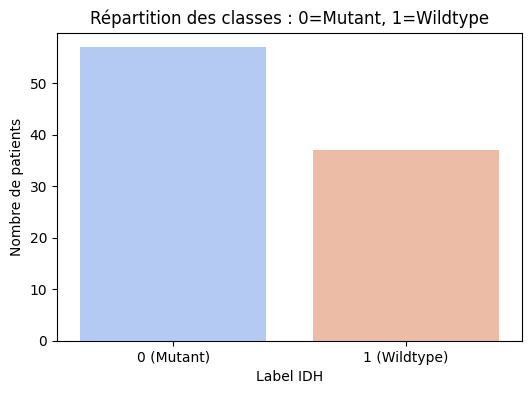

✅ Fichier mis à jour et sauvegardé : c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_final.csv
   La colonne 'IDH_status' (texte) a été remplacée par 'IDH_label' (0/1).

Aperçu final :
  Patient_ID                                        Chemins_IRM  IDH_label
0   CGGA_715  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...          0
1   CGGA_864  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...          0
2   CGGA_871  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...          0
3  CGGA_1226  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...          1
4  CGGA_1282  c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGG...          1


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
DATA_FILE = BASE_DIR / "data" / "dataset_final.csv"

print(f"📍 Analyse du fichier : {DATA_FILE.name}")

# 1. Chargement
df = pd.read_csv(DATA_FILE)

# 2. Conversion (Mapping)
# Tu as demandé : Mutant -> 0, Wildtype -> 1
mapping = {
    'Mutant': 0, 
    'Wildtype': 1,
    'mutant': 0,   # (sécurité au cas où c'est en minuscule)
    'wildtype': 1
}

# On applique la transformation
# On convertit d'abord en string pour être sûr, puis on map
df['IDH_label'] = df['IDH_status'].astype(str).map(mapping)

# Vérification s'il y a des valeurs qu'on n'a pas réussi à convertir (NaN)
if df['IDH_label'].isnull().sum() > 0:
    print("⚠️ ATTENTION : Certaines lignes n'ont pas pu être converties !")
    print(df[df['IDH_label'].isnull()])
    # On les supprime pour être propre
    df = df.dropna(subset=['IDH_label'])

# On s'assure que c'est bien des entiers (int)
df['IDH_label'] = df['IDH_label'].astype(int)

# 3. Analyse de l'Équilibre
counts = df['IDH_label'].value_counts()
print("\n📊 ÉQUILIBRE DU DATASET :")
print(f"   Total patients : {len(df)}")
print(f"   ---------------------------")
print(f"   Groupe 0 (Mutant)   : {counts.get(0, 0)} patients")
print(f"   Groupe 1 (Wildtype) : {counts.get(1, 0)} patients")
print(f"   ---------------------------")

# 4. Visualisation
plt.figure(figsize=(6, 4))
sns.countplot(x='IDH_label', data=df, palette='coolwarm')
plt.title('Répartition des classes : 0=Mutant, 1=Wildtype')
plt.xlabel('Label IDH')
plt.ylabel('Nombre de patients')
plt.xticks([0, 1], ['0 (Mutant)', '1 (Wildtype)'])
plt.show()

# 5. Sauvegarde Finale
# On ne garde que les colonnes utiles pour l'IA
df_final = df[['Patient_ID', 'Chemins_IRM', 'IDH_label']]
df_final.to_csv(DATA_FILE, index=False)

print(f"✅ Fichier mis à jour et sauvegardé : {DATA_FILE}")
print("   La colonne 'IDH_status' (texte) a été remplacée par 'IDH_label' (0/1).")
print("\nAperçu final :")
print(df_final.head())

In [25]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"
CLINICAL_FILE = BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt"

print("🕵️‍♂️ ENQUÊTE SUR LES IMAGES 'ORPHELINES'...")

# 1. RECENSEMENT DES IMAGES VALIDES
# On ne compte que les dossiers qui contiennent VRAIMENT un fichier .nii
patients_avec_images = []
for folder in IMG_DIR.iterdir():
    if folder.is_dir():
        # On vérifie s'il y a au moins un fichier image dedans
        if any(folder.glob("*.nii*")):
            # On stocke le nom normalisé
            patients_avec_images.append(folder.name.lower().replace("_",""))

set_images_valides = set(patients_avec_images)
print(f"📦 Total dossiers avec images valides : {len(set_images_valides)}")

# 2. RECENSEMENT DU CLINIQUE
# On recharge les IDs du fichier texte
try:
    df_clin = pd.read_csv(CLINICAL_FILE, sep='\t', encoding='ISO-8859-1')
    # On cherche la colonne ID
    cols = df_clin.columns.tolist()
    col_id = [c for c in cols if 'CGGA' in c or 'ID' in c][0]
    set_clinique = set(df_clin[col_id].astype(str).str.lower().str.replace("_",""))
    print(f"📝 Total patients dans le fichier texte : {len(set_clinique)}")
except:
    print("❌ Erreur de lecture du fichier clinique (vérifie le code précédent).")
    set_clinique = set()

# 3. LE CALCUL DES "ORPHELINS"
# Ceux qui sont dans les Images MAIS PAS dans le Clinique
images_orphelines = set_images_valides - set_clinique

count_orphans = len(images_orphelines)
count_match = len(set_images_valides.intersection(set_clinique))

print("\n" + "="*40)
print(f"📊 RÉSULTAT DE L'ANALYSE :")
print(f"   ✅ Images couplées (Utilisables) : {count_match}")
print(f"   ⚠️ Images orphelines (Inutiles)  : {count_orphans}")
print("="*40)

if count_orphans > 0:
    print("\n🔍 Exemples de patients qui ont des images mais pas de dossier clinique :")
    # On affiche 5 exemples pour voir à quoi ils ressemblent
    print(list(images_orphelines)[:5])
    
    print("\n💡 POURQUOI ?")
    print("   Ces patients (ex: CGGA_1001, etc.) ne font pas partie de l'étude 'WEseq_286'.")
    print("   Ils font probablement partie d'une autre étude (ex: mRNAseq_693 ou mRNAseq_325).")

🕵️‍♂️ ENQUÊTE SUR LES IMAGES 'ORPHELINES'...
📦 Total dossiers avec images valides : 268
📝 Total patients dans le fichier texte : 286

📊 RÉSULTAT DE L'ANALYSE :
   ✅ Images couplées (Utilisables) : 94
   ⚠️ Images orphelines (Inutiles)  : 174

🔍 Exemples de patients qui ont des images mais pas de dossier clinique :
['cgga1051', 'cgga1015', 'cgga1144', 'cgga525', 'cgga366']

💡 POURQUOI ?
   Ces patients (ex: CGGA_1001, etc.) ne font pas partie de l'étude 'WEseq_286'.
   Ils font probablement partie d'une autre étude (ex: mRNAseq_693 ou mRNAseq_325).


In [26]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"
# Ton fichier actuel (le petit)
CLINICAL_FILE = BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt"

# 1. Lister les Images
set_images = set()
for folder in IMG_DIR.iterdir():
    if folder.is_dir() and any(folder.glob("*.nii*")):
        set_images.add(folder.name.lower().replace("_",""))

# 2. Lister le Fichier Texte Actuel
try:
    df_clin = pd.read_csv(CLINICAL_FILE, sep='\t', encoding='ISO-8859-1')
    col_id = [c for c in df_clin.columns if 'CGGA' in c or 'ID' in c][0]
    set_clinique = set(df_clin[col_id].astype(str).str.lower().str.replace("_",""))
except:
    set_clinique = set()

# 3. Trouver les orphelins
orphelins = list(set_images - set_clinique)
orphelins.sort()

print(f"👻 Voici 10 exemples des 174 orphelins :")
print(orphelins[:10])
print(f"\n👉 Total orphelins : {len(orphelins)}")

print("\n💡 ANALYSE :")
print("Regarde ces numéros (ex: cgga1000+).")
print("S'ils sont élevés, ils APPARTIENNENT au fichier 'mRNAseq_693'.")

👻 Voici 10 exemples des 174 orphelins :
['cgga1001', 'cgga1004', 'cgga1006', 'cgga1007', 'cgga1008', 'cgga1011', 'cgga1015', 'cgga1017', 'cgga1027', 'cgga1028']

👉 Total orphelins : 174

💡 ANALYSE :
Regarde ces numéros (ex: cgga1000+).
S'ils sont élevés, ils APPARTIENNENT au fichier 'mRNAseq_693'.


In [27]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"
# Le NOUVEAU fichier que tu viens d'ajouter
NEW_CLINICAL_FILE = BASE_DIR / "data" / "CGGA.mRNAseq_693_clinical.20200506.txt"

print(f"🕵️‍♂️ TEST DU FICHIER : {NEW_CLINICAL_FILE.name}")

if not NEW_CLINICAL_FILE.exists():
    print("❌ ERREUR : Le fichier est introuvable dans le dossier data !")
    print("👉 Vérifie qu'il est bien nommé exactement comme ci-dessus.")
else:
    # 1. SCAN DES IMAGES (On reprend toutes les images)
    print("\n1️⃣ Scan des images...")
    set_images = set()
    for folder in IMG_DIR.iterdir():
        if folder.is_dir() and any(folder.glob("*.nii*")):
            set_images.add(folder.name.lower().replace("_",""))
    print(f"   -> {len(set_images)} dossiers images trouvés au total.")

    # 2. LECTURE DU NOUVEAU FICHIER CLINIQUE (693)
    print("\n2️⃣ Lecture du fichier clinique 693...")
    try:
        # On tente de lire (souvent en latin-1 ou utf-8)
        df_new = pd.read_csv(NEW_CLINICAL_FILE, sep='\t', encoding='ISO-8859-1')
        
        # Identification de la colonne ID
        cols = df_new.columns.tolist()
        col_id = [c for c in cols if 'CGGA' in c or 'ID' in c][0]
        col_idh = [c for c in cols if 'IDH' in c and 'status' in c][0]
        
        print(f"   -> Colonnes trouvées : ID='{col_id}', IDH='{col_idh}'")
        
        # Création du set des IDs du fichier texte
        set_new_clinical = set(df_new[col_id].astype(str).str.lower().str.replace("_",""))
        print(f"   -> {len(set_new_clinical)} patients dans le fichier texte.")

    except Exception as e:
        print(f"❌ Erreur de lecture : {e}")
        set_new_clinical = set()

    # 3. LE VERDICT
    print("\n3️⃣ RÉSULTAT DU MATCHING...")
    
    # Combien d'images matchent avec ce nouveau fichier ?
    matches = set_images.intersection(set_new_clinical)
    count = len(matches)
    
    print("="*40)
    print(f"🎉 CORRESPONDANCES TROUVÉES : {count}")
    print("="*40)

    if count > 150:
        print("✅ C'EST GAGNÉ ! Ce fichier contient bien tes images manquantes.")
        print("👉 On va pouvoir fusionner les deux sources pour avoir une base de données énorme.")
    elif count == 0:
        print("❌ Toujours 0... C'est très étrange. Vérifie le nom des colonnes.")
    else:
        print(f"⚠️ Tu as récupéré {count} patients. C'est mieux, mais vérifie s'il en manque encore.")

🕵️‍♂️ TEST DU FICHIER : CGGA.mRNAseq_693_clinical.20200506.txt

1️⃣ Scan des images...
   -> 268 dossiers images trouvés au total.

2️⃣ Lecture du fichier clinique 693...
   -> Colonnes trouvées : ID='CGGA_ID', IDH='IDH_mutation_status'
   -> 693 patients dans le fichier texte.

3️⃣ RÉSULTAT DU MATCHING...
🎉 CORRESPONDANCES TROUVÉES : 127
⚠️ Tu as récupéré 127 patients. C'est mieux, mais vérifie s'il en manque encore.


In [28]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"
FILE_286 = BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt"
FILE_693 = BASE_DIR / "data" / "CGGA.mRNAseq_693_clinical.20200506.txt"
OUTPUT_FILE = BASE_DIR / "data" / "dataset_final_merged.csv"

print("🔥 DÉMARRAGE DE LA GRANDE FUSION...")

# --- ÉTAPE 1 : FONCTION DE LECTURE INTELLIGENTE ---
def load_clinical_file(filepath):
    if not filepath.exists():
        print(f"⚠️ Fichier introuvable : {filepath.name}")
        return pd.DataFrame()
    
    # Tentative de lecture robuste
    try:
        df = pd.read_csv(filepath, sep='\t', encoding='utf-8')
    except:
        df = pd.read_csv(filepath, sep='\t', encoding='ISO-8859-1')
    
    # Normalisation des colonnes importantes
    # On cherche la colonne ID (CGGA_ID ou similaire)
    col_id = [c for c in df.columns if 'CGGA' in c or 'ID' in c][0]
    # On cherche la colonne IDH (IDH_mutation_status ou similaire)
    col_idh = [c for c in df.columns if 'IDH' in c and 'status' in c][0]
    
    # On renomme pour avoir des standards
    df = df.rename(columns={col_id: 'Patient_ID', col_idh: 'IDH_status'})
    
    # On nettoie l'ID pour la liaison (minuscule, sans tiret)
    df['patient_key'] = df['Patient_ID'].astype(str).str.lower().str.replace("_", "").str.strip()
    
    # On garde que ce qui nous intéresse
    return df[['Patient_ID', 'patient_key', 'IDH_status']]

# --- ÉTAPE 2 : CHARGEMENT ET UNION DES FICHIERS ---
print("\n1️⃣ Chargement des fichiers cliniques...")
df1 = load_clinical_file(FILE_286)
print(f"   -> Fichier 286 : {len(df1)} patients")

df2 = load_clinical_file(FILE_693)
print(f"   -> Fichier 693 : {len(df2)} patients")

# Fusion (Concaténation)
full_clinical = pd.concat([df1, df2], ignore_index=True)

# Suppression des doublons (si un patient est dans les deux fichiers, on garde la première info)
full_clinical = full_clinical.drop_duplicates(subset=['patient_key'])
print(f"✅ Total patients uniques connus : {len(full_clinical)}")


# --- ÉTAPE 3 : SCAN DES IMAGES ---
print("\n2️⃣ Scan des images...")
image_data = []
for folder in IMG_DIR.iterdir():
    if folder.is_dir():
        # On cherche une image .nii
        img_path = next(folder.glob("*.nii*"), None)
        if img_path:
            image_data.append({
                'patient_key': folder.name.lower().replace("_", ""),
                'Chemins_IRM': str(img_path)
            })
df_images = pd.DataFrame(image_data)
print(f"   -> {len(df_images)} dossiers images trouvés.")


# --- ÉTAPE 4 : LE MARIAGE FINAL ---
print("\n3️⃣ Fusion Images + Clinique...")
final_df = pd.merge(df_images, full_clinical, on='patient_key', how='inner')

# --- ÉTAPE 5 : NETTOYAGE ET LABELING (0/1) ---
# Conversion Mutant -> 0, Wildtype -> 1
mapping = {'Mutant': 0, 'Wildtype': 1, 'mutant': 0, 'wildtype': 1}
final_df['IDH_label'] = final_df['IDH_status'].astype(str).map(mapping)

# On vire ceux qui n'ont pas de label clair (NaN)
final_df = final_df.dropna(subset=['IDH_label'])
final_df['IDH_label'] = final_df['IDH_label'].astype(int)

# --- BILAN ---
count = len(final_df)
print("="*50)
print(f"🎉 RÉSULTAT FINAL : {count} PATIENTS PRÊTS !")
print("="*50)

if count > 0:
    # Sauvegarde
    cols_to_save = ['Patient_ID', 'Chemins_IRM', 'IDH_label']
    final_df[cols_to_save].to_csv(OUTPUT_FILE, index=False)
    print(f"💾 Fichier sauvegardé : {OUTPUT_FILE}")
    
    # Stats
    print("\n📊 Répartition des classes :")
    print(final_df['IDH_label'].value_counts())
else:
    print("❌ Zéro correspondance... Vérifie tes fichiers.")

🔥 DÉMARRAGE DE LA GRANDE FUSION...

1️⃣ Chargement des fichiers cliniques...
   -> Fichier 286 : 286 patients
   -> Fichier 693 : 693 patients
✅ Total patients uniques connus : 794

2️⃣ Scan des images...
   -> 268 dossiers images trouvés.

3️⃣ Fusion Images + Clinique...
🎉 RÉSULTAT FINAL : 143 PATIENTS PRÊTS !
💾 Fichier sauvegardé : c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_final_merged.csv

📊 Répartition des classes :
IDH_label
0    88
1    55
Name: count, dtype: int64


In [29]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"

# 📂 LISTE DES 3 FICHIERS CLINIQUES (La Trinité)
FILES = [
    BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt",
    BASE_DIR / "data" / "CGGA.mRNAseq_693_clinical.20200506.txt",
    BASE_DIR / "data" / "CGGA.mRNAseq_325_clinical.20200506.txt"  # Le petit dernier !
]
OUTPUT_FILE = BASE_DIR / "data" / "dataset_final_merged.csv"

print("🔥 DÉMARRAGE DE LA FUSION TOTALE (3 SOURCES)...")

# --- 1. FONCTION DE LECTURE ROBUSTE ---
def load_clinical_file(filepath):
    if not filepath.exists():
        print(f"⚠️ MANQUANT : {filepath.name} (Vérifie le nom !)")
        return pd.DataFrame()
    
    print(f"📄 Lecture de : {filepath.name}...")
    try:
        # Essai UTF-8 puis Latin-1
        try:
            df = pd.read_csv(filepath, sep='\t', encoding='utf-8')
        except:
            df = pd.read_csv(filepath, sep='\t', encoding='ISO-8859-1')
        
        # Identification automatique des colonnes
        cols = df.columns.tolist()
        # On cherche l'ID (ex: CGGA_ID, Patient_ID)
        col_id = next((c for c in cols if 'CGGA' in c or 'ID' in c), None)
        # On cherche l'IDH (ex: IDH_mutation_status)
        col_idh = next((c for c in cols if 'IDH' in c and 'status' in c), None)
        
        if col_id and col_idh:
            # Standardisation
            df = df.rename(columns={col_id: 'Patient_ID', col_idh: 'IDH_status'})
            # Création de la clé de liaison (minuscule, sans tiret)
            df['patient_key'] = df['Patient_ID'].astype(str).str.lower().str.replace("_", "").str.strip()
            # On retourne juste ce qu'il faut
            return df[['Patient_ID', 'patient_key', 'IDH_status']]
        else:
            print(f"❌ Colonnes ID ou IDH introuvables dans {filepath.name}")
            return pd.DataFrame()
            
    except Exception as e:
        print(f"❌ Erreur critique sur {filepath.name} : {e}")
        return pd.DataFrame()

# --- 2. AGGRÉGATION DES DONNÉES CLINIQUES ---
dfs = []
for f in FILES:
    res_df = load_clinical_file(f)
    if not res_df.empty:
        dfs.append(res_df)
        print(f"   -> Ajouté : {len(res_df)} lignes")

if dfs:
    # On empile tout
    full_clinical = pd.concat(dfs, ignore_index=True)
    # On supprime les doublons (au cas où un patient est dans 2 fichiers)
    full_clinical = full_clinical.drop_duplicates(subset=['patient_key'])
    print(f"\n📚 BASE CLINIQUE TOTALE : {len(full_clinical)} patients uniques connus.")
else:
    print("❌ ECHEC : Aucun fichier clinique n'a pu être lu.")
    full_clinical = pd.DataFrame()

# --- 3. SCAN DES IMAGES PHYSIQUES ---
print("\n📸 Inventaire des images sur le disque...")
image_data = []
# On scanne les dossiers
for folder in IMG_DIR.iterdir():
    if folder.is_dir():
        # On cherche s'il y a un .nii dedans
        img_path = next(folder.glob("*.nii*"), None)
        if img_path:
            image_data.append({
                'patient_key': folder.name.lower().replace("_", ""),
                'Chemins_IRM': str(img_path)
            })
df_images = pd.DataFrame(image_data)
print(f"📦 Total dossiers images trouvés : {len(df_images)}")

# --- 4. LA GRANDE FUSION (MATCHING) ---
if not full_clinical.empty and not df_images.empty:
    print("\n🔗 LIAISON EN COURS...")
    
    # Merge Inner (Intersection)
    final_df = pd.merge(df_images, full_clinical, on='patient_key', how='inner')
    
    # --- 5. ENCODAGE FINAL (0/1) ---
    mapping = {'Mutant': 0, 'Wildtype': 1, 'mutant': 0, 'wildtype': 1}
    final_df['IDH_label'] = final_df['IDH_status'].astype(str).map(mapping)
    
    # Nettoyage des ratés
    final_df = final_df.dropna(subset=['IDH_label'])
    final_df['IDH_label'] = final_df['IDH_label'].astype(int)
    
    # --- RÉSULTATS ---
    count = len(final_df)
    
    

    print("\n" + "="*50)
    print(f"🎉 RÉSULTAT FINAL MAXIMAL : {count} PATIENTS MATCHÉS !")
    print("="*50)
    
    if count > 200:
        print("✅ VICTOIRE ! Tu as récupéré la quasi-totalité de tes données.")
    
    print("\n📊 Équilibre des classes :")
    print(final_df['IDH_label'].value_counts())
    
    # Sauvegarde
    cols = ['Patient_ID', 'Chemins_IRM', 'IDH_label']
    final_df[cols].to_csv(OUTPUT_FILE, index=False)
    print(f"\n💾 Sauvegardé dans : {OUTPUT_FILE}")
    print("👉 C'est CE fichier que tu utiliseras pour l'IA.")

else:
    print("❌ Impossible de fusionner. Vérifie les étapes précédentes.")

🔥 DÉMARRAGE DE LA FUSION TOTALE (3 SOURCES)...
📄 Lecture de : CGGA.WEseq_286_clinical.20200506.txt...
   -> Ajouté : 286 lignes
📄 Lecture de : CGGA.mRNAseq_693_clinical.20200506.txt...
   -> Ajouté : 693 lignes
📄 Lecture de : CGGA.mRNAseq_325_clinical.20200506.txt...
   -> Ajouté : 325 lignes

📚 BASE CLINIQUE TOTALE : 1073 patients uniques connus.

📸 Inventaire des images sur le disque...
📦 Total dossiers images trouvés : 268

🔗 LIAISON EN COURS...

🎉 RÉSULTAT FINAL MAXIMAL : 196 PATIENTS MATCHÉS !

📊 Équilibre des classes :
IDH_label
0    120
1     76
Name: count, dtype: int64

💾 Sauvegardé dans : c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_final_merged.csv
👉 C'est CE fichier que tu utiliseras pour l'IA.


In [30]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
FILES = {
    "286": BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt",
    "693": BASE_DIR / "data" / "CGGA.mRNAseq_693_clinical.20200506.txt",
    "325": BASE_DIR / "data" / "CGGA.mRNAseq_325_clinical.20200506.txt"
}

print("🕵️‍♂️ INSPECTION DES COLONNES (Comparatif)...")

column_sets = {}

for name, filepath in FILES.items():
    print(f"\n📂 FICHIER : {name} ({filepath.name})")
    if filepath.exists():
        try:
            # Lecture
            try:
                df = pd.read_csv(filepath, sep='\t', encoding='utf-8')
            except:
                df = pd.read_csv(filepath, sep='\t', encoding='ISO-8859-1')
            
            # Stockage des colonnes
            cols = df.columns.tolist()
            column_sets[name] = set(cols)
            
            print(f"   -> Nombre de colonnes : {len(cols)}")
            print(f"   -> 5 premières colonnes : {cols[:5]}")
            
            # Vérification des colonnes VITALES
            has_id = any('CGGA' in c or 'ID' in c for c in cols)
            has_idh = any('IDH' in c for c in cols)
            
            if has_id and has_idh:
                print("   ✅ Colonnes VITALES (ID + IDH) : PRÉSENTES")
            else:
                print("   ⚠️ ATTENTION : Il manque l'ID ou l'IDH dans ce fichier !")
                
        except Exception as e:
            print(f"   ❌ Erreur de lecture : {e}")
    else:
        print("   ❌ Fichier introuvable.")

# --- COMPARAISON CROISÉE ---
print("\n" + "="*40)
print("⚖️ VERDICT DE LA COMPARAISON")
print("="*40)

if len(column_sets) == 3:
    cols_286 = column_sets["286"]
    cols_693 = column_sets["693"]
    cols_325 = column_sets["325"]
    
    # Intersection (ce qu'ils ont tous en commun)
    common = cols_286.intersection(cols_693).intersection(cols_325)
    
    print(f"🔗 Colonnes communes aux 3 fichiers : {len(common)}")
    print(f"   Exemples : {list(common)[:5]}")
    
    if len(common) > 5:
        print("\n✅ CONCLUSION : Les fichiers sont COMPATIBLES.")
        print("   Ils partagent suffisamment de colonnes (surtout ID et IDH) pour être fusionnés.")
        print("   Lors de la fusion précédente, pandas a automatiquement aligné ces colonnes communes.")
    else:
        print("\n⚠️ CONCLUSION : Les fichiers semblent très différents. Vérifie les noms.")

🕵️‍♂️ INSPECTION DES COLONNES (Comparatif)...

📂 FICHIER : 286 (CGGA.WEseq_286_clinical.20200506.txt)
   -> Nombre de colonnes : 13
   -> 5 premières colonnes : ['CGGA_ID', 'Subtype', 'Histology', 'Grade', 'Gender']
   ✅ Colonnes VITALES (ID + IDH) : PRÉSENTES

📂 FICHIER : 693 (CGGA.mRNAseq_693_clinical.20200506.txt)
   -> Nombre de colonnes : 13
   -> 5 premières colonnes : ['CGGA_ID', 'PRS_type', 'Histology', 'Grade', 'Gender']
   ✅ Colonnes VITALES (ID + IDH) : PRÉSENTES

📂 FICHIER : 325 (CGGA.mRNAseq_325_clinical.20200506.txt)
   -> Nombre de colonnes : 13
   -> 5 premières colonnes : ['CGGA_ID', 'PRS_type', 'Histology', 'Grade', 'Gender']
   ✅ Colonnes VITALES (ID + IDH) : PRÉSENTES

⚖️ VERDICT DE LA COMPARAISON
🔗 Colonnes communes aux 3 fichiers : 11
   Exemples : ['Radio_status (treated=1;un-treated=0)', 'OS', 'Age', 'Grade', 'CGGA_ID']

✅ CONCLUSION : Les fichiers sont COMPATIBLES.
   Ils partagent suffisamment de colonnes (surtout ID et IDH) pour être fusionnés.
   Lors de la 

🕵️‍♂️ ANALYSE DE L'ORIGINE TEMPORELLE DES IMAGES...

📊 SUR TES 196 IMAGES MATCHÉES :
Source
Etude_286 (Ancien)    94
Etude_325 (Autre)     53
Etude_693 (Récent)    49
Name: count, dtype: int64


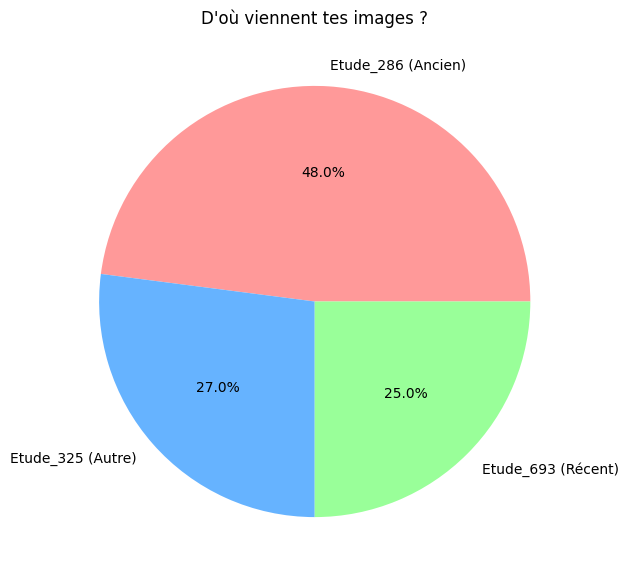


⚠️ Reste non identifié : 72 images (qui ne sont dans aucun des 3 fichiers)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIGURATION ---
BASE_DIR = Path.cwd()
IMG_DIR = BASE_DIR / "data" / "CGGA"
FILES = {
    "Etude_286 (Ancien)": BASE_DIR / "data" / "CGGA.WEseq_286_clinical.20200506.txt",
    "Etude_693 (Récent)": BASE_DIR / "data" / "CGGA.mRNAseq_693_clinical.20200506.txt",
    "Etude_325 (Autre)":  BASE_DIR / "data" / "CGGA.mRNAseq_325_clinical.20200506.txt"
}

print("🕵️‍♂️ ANALYSE DE L'ORIGINE TEMPORELLE DES IMAGES...")

# 1. Chargement avec étiquette d'origine
dfs = []
for source_name, filepath in FILES.items():
    if filepath.exists():
        try:
            # Lecture flexible
            try:
                df = pd.read_csv(filepath, sep='\t', encoding='utf-8')
            except:
                df = pd.read_csv(filepath, sep='\t', encoding='ISO-8859-1')
            
            # Normalisation ID
            col_id = next((c for c in df.columns if 'CGGA' in c or 'ID' in c), None)
            col_idh = next((c for c in df.columns if 'IDH' in c and 'status' in c), None)
            
            if col_id and col_idh:
                temp = pd.DataFrame()
                temp['patient_key'] = df[col_id].astype(str).str.lower().str.replace("_", "").str.strip()
                temp['Source'] = source_name # <-- ON AJOUTE L'ÉTIQUETTE ICI
                dfs.append(temp)
        except:
            pass

# 2. Concaténation (On garde la première source trouvée pour chaque patient)
if dfs:
    full_clinical = pd.concat(dfs, ignore_index=True)
    # Si un patient est dans 2 fichiers, on garde l'étiquette du premier fichier lu
    full_clinical = full_clinical.drop_duplicates(subset=['patient_key'])
else:
    print("❌ Aucun fichier clinique chargé.")
    full_clinical = pd.DataFrame()

# 3. Scan des Images
image_keys = []
for folder in IMG_DIR.iterdir():
    if folder.is_dir() and any(folder.glob("*.nii*")):
        image_keys.append(folder.name.lower().replace("_", ""))
df_images = pd.DataFrame(image_keys, columns=['patient_key'])

# 4. Fusion pour voir la répartition
merged = pd.merge(df_images, full_clinical, on='patient_key', how='inner')

# 5. RÉSULTATS
print(f"\n📊 SUR TES {len(merged)} IMAGES MATCHÉES :")
counts = merged['Source'].value_counts()
print(counts)

# Graphique Camembert
plt.figure(figsize=(7, 7))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("D'où viennent tes images ?")
plt.show()

# 6. Et les autres ?
total_images = len(df_images)
matchs = len(merged)
restants = total_images - matchs
print(f"\n⚠️ Reste non identifié : {restants} images (qui ne sont dans aucun des 3 fichiers)")

In [4]:
import pandas as pd
from pathlib import Path

# --- CONFIGURATION (CHEMINS ABSOLUS) ---
INPUT_FILE = Path(r"c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_final_merged.csv")
IMG_DIR = Path(r"c:\Users\lenovo\Desktop\PROJET_GLIOME\data\CGGA")
OUTPUT_FILE = Path(r"c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_T1_only.csv")

print("🎯 DÉMARRAGE DU FILTRAGE : MODALITÉ T1 UNIQUEMENT")

if not INPUT_FILE.exists():
    print(f"❌ Erreur critique : Fichier introuvable : {INPUT_FILE}")
else:
    df = pd.read_csv(INPUT_FILE)
    
    # --- 🛠️ CORRECTION ICI : ON RECRÉE LA COLONNE MANQUANTE ---
    # On refabrique la clé de liaison à partir de l'ID patient
    df['patient_key'] = df['Patient_ID'].astype(str).str.lower().str.replace("_", "").str.strip()
    
    print(f"📂 Dataset chargé : {len(df)} patients.")
    print("✅ Colonne 'patient_key' régénérée avec succès.")

    # Fonction pour trouver le fichier T1 spécifique
    def find_t1_image(patient_key):
        patient_folder = None
        if not IMG_DIR.exists(): return None

        # Recherche du dossier
        for folder in IMG_DIR.iterdir():
            if folder.is_dir() and folder.name.lower().replace("_", "") == str(patient_key):
                patient_folder = folder
                break
        
        if not patient_folder: return None

        # Recherche du fichier T1
        files = list(patient_folder.glob("*.nii*"))
        t1_candidate = None
        
        for f in files:
            name = f.name.lower()
            # Filtre strict : T1 oui, mais pas CE (Contraste), pas GAD (Gadolinium)
            if "t1" in name and "ce" not in name and "gad" not in name and "c+" not in name:
                t1_candidate = str(f)
                break 
        
        return t1_candidate

    # 2. Appliquer la recherche
    print("\n🔍 Recherche des fichiers T1 spécifiques en cours...")
    
    new_rows = []
    
    for index, row in df.iterrows():
        key = row['patient_key']
        t1_path = find_t1_image(key)
        
        if t1_path:
            new_row = row.copy()
            new_row['Chemins_IRM'] = t1_path
            new_rows.append(new_row)
            
    # 3. Résultat
    df_t1 = pd.DataFrame(new_rows)

    print("="*50)
    print(f"🎉 FILTRAGE TERMINÉ")
    print(f"👥 Total initial : {len(df)}")
    print(f"📉 Total T1 'purs' trouvés : {len(df_t1)}")
    print("="*50)

    # 4. Sauvegarde
    if not df_t1.empty:
        # On sauvegarde tout cette fois, au cas où
        df_t1.to_csv(OUTPUT_FILE, index=False)
        print(f"💾 Fichier sauvegardé : {OUTPUT_FILE}")
        print(f"👉 Nombre final de patients pour l'IA : {len(df_t1)}")
    else:
        print("❌ Zéro fichier T1 trouvé. Vérifie tes noms de fichiers.")

🎯 DÉMARRAGE DU FILTRAGE : MODALITÉ T1 UNIQUEMENT
📂 Dataset chargé : 196 patients.
✅ Colonne 'patient_key' régénérée avec succès.

🔍 Recherche des fichiers T1 spécifiques en cours...
🎉 FILTRAGE TERMINÉ
👥 Total initial : 196
📉 Total T1 'purs' trouvés : 192
💾 Fichier sauvegardé : c:\Users\lenovo\Desktop\PROJET_GLIOME\data\dataset_T1_only.csv
👉 Nombre final de patients pour l'IA : 192
